# Problem set 3

#### 학과 : e-비즈니스학과
#### 학번 : 201921527
#### 이름 : 박성우

### 1. As indicated in the textbook, the ACF of a series with a unit root shows little tendency to decay. Nevertheless, it may difficult to detect a unit root in a series with a negative moving average. Consider the unit root process yt = yt−1 + εt − 0.8εt−1.

#### 1.a Iterate backward from yt to solve for yt in terms of the {εt} series and the initial condition y0.

In [1]:
from IPython.display import Image

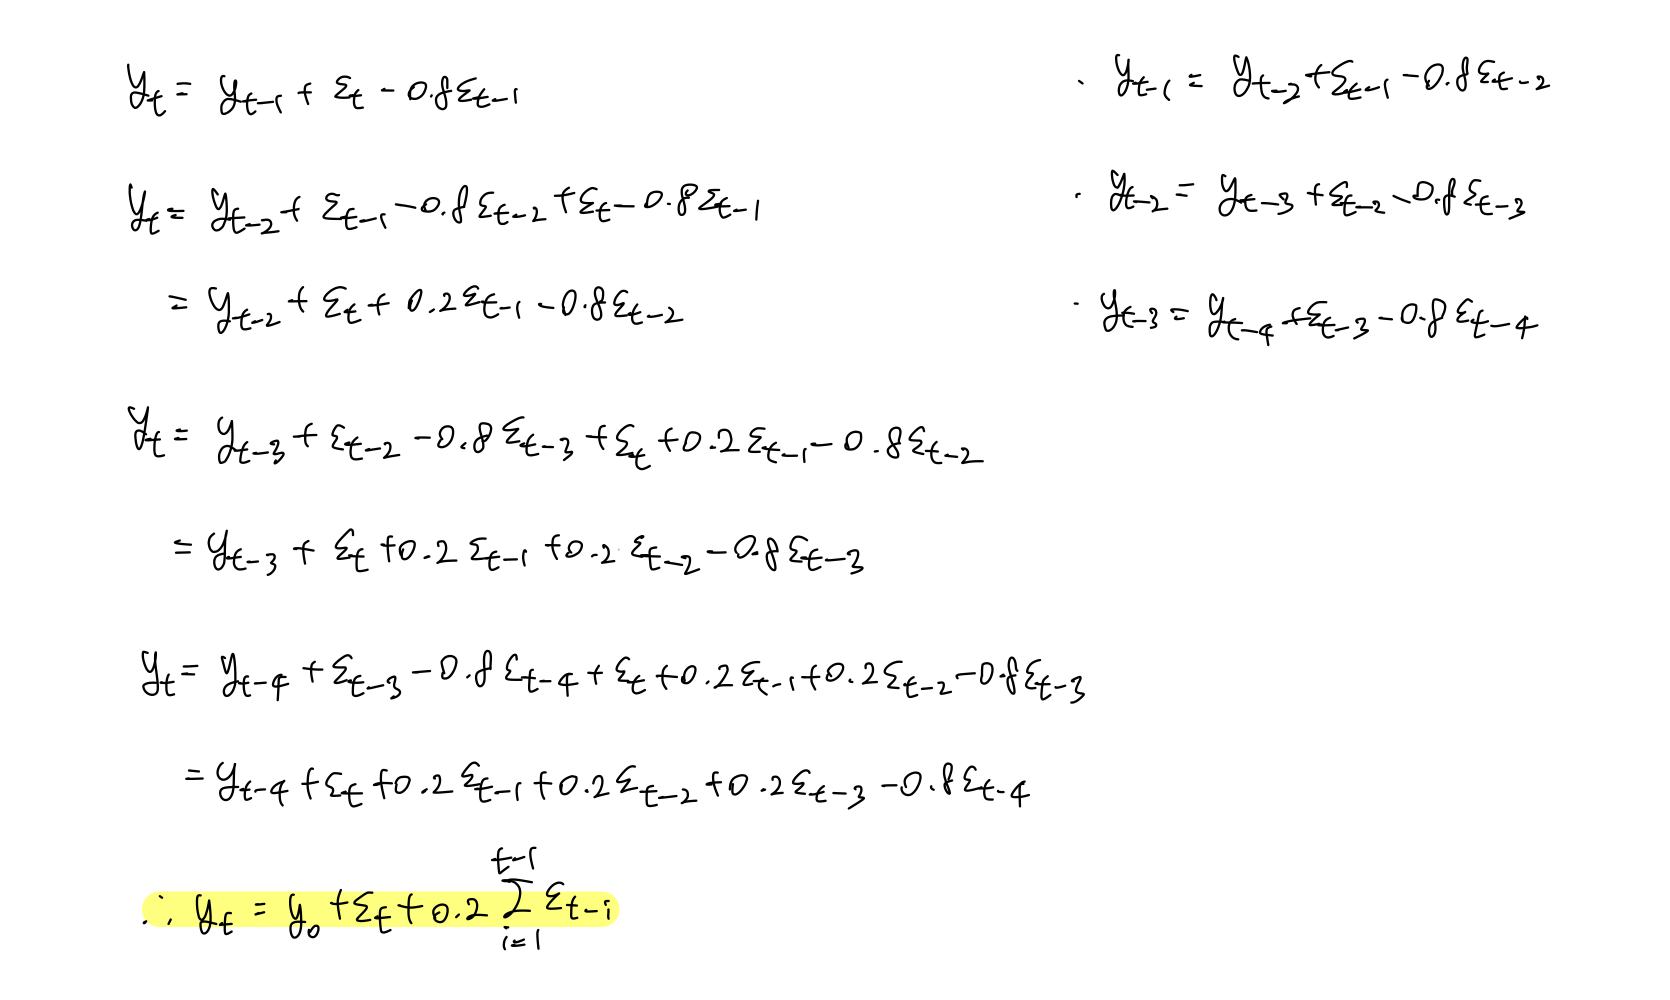

In [2]:
Image('1_a.jpg')

#### 1.b Use your answer to (a) to derive the first few terms of the ACF.

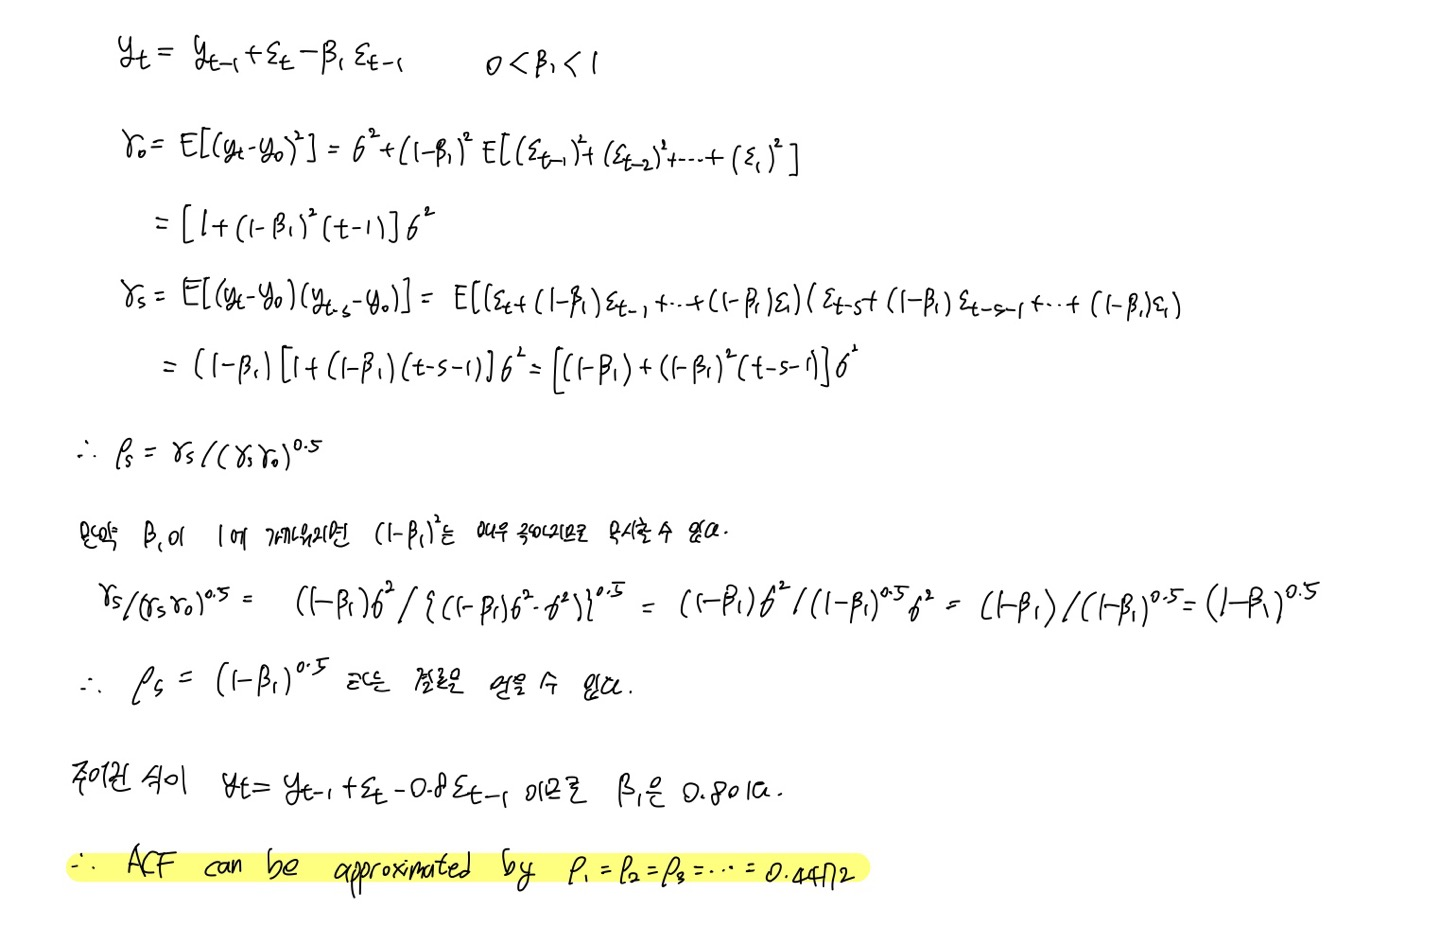

In [3]:
Image('1_b.jpeg')

#### 1.c Explain how the negative MA term affects the shape of the ACF. In particular, explain how the series is “infinitely persistent” even though the coefficient of the ACF are far below unity.

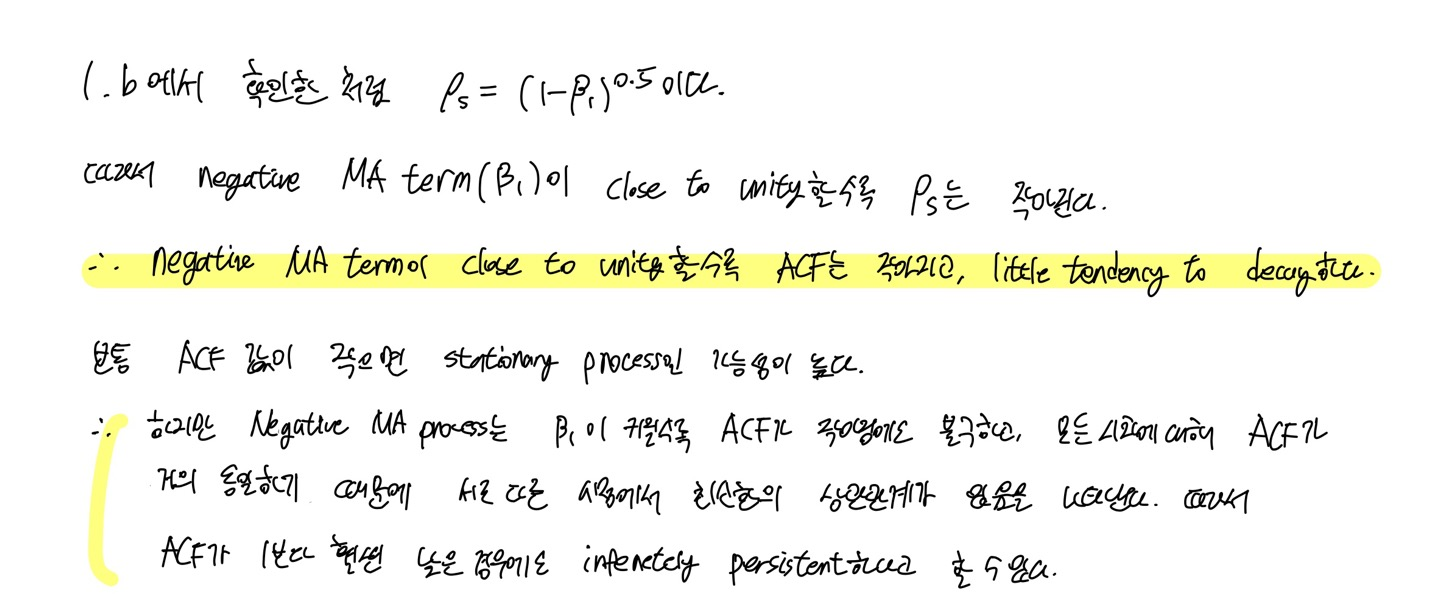

In [4]:
Image('1_c.jpeg')

---

### Load packages

In [5]:
# Load data-preprocessing pacakages
import pandas as pd
import numpy as np

# Load visualization pacakage
import matplotlib.pyplot as plt

# Load modeling pacakages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

# ignore warning
import warnings
warnings.filterwarnings('ignore')

### 2. The file QUARTERLY.XLSX contains the U.S. interest rate data used in Section 10 of Chapter 2. Form the spread st, by subtracting t-bill rate from the 5-year rate. Recall that the spread appeared to be quite persistent in that ρ1 = 0.86 and ρ2 = 0.68.

#### Data Load

In [6]:
df = pd.read_csv('QUARTERLY_PR3.csv')
df.set_index('Date',drop=True, inplace = True)
df

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
Date,,,,,,,,,,,,,,,,,,
1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-01,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
2012-01-01,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
2012-04-01,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500


#### Visualization Tbill

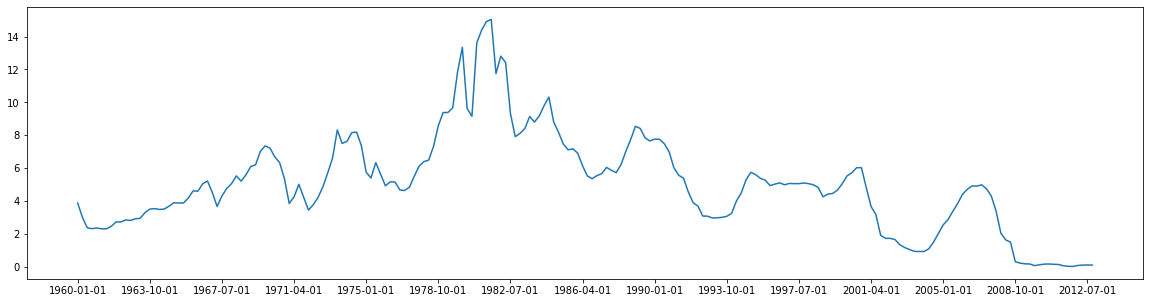

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['Tbill'])

#### Visualization r5

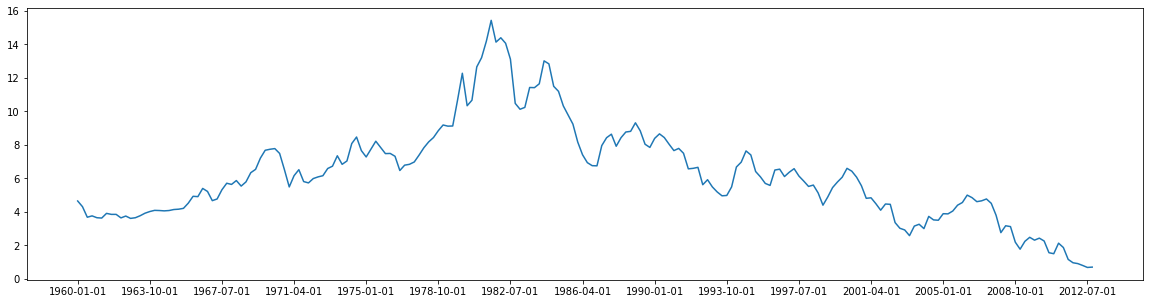

In [8]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['r5'])

##### spread 변수 생성

In [9]:
df['spread'] = df['Tbill'] - df['r5']
df = df.dropna()

#### Visualization spread

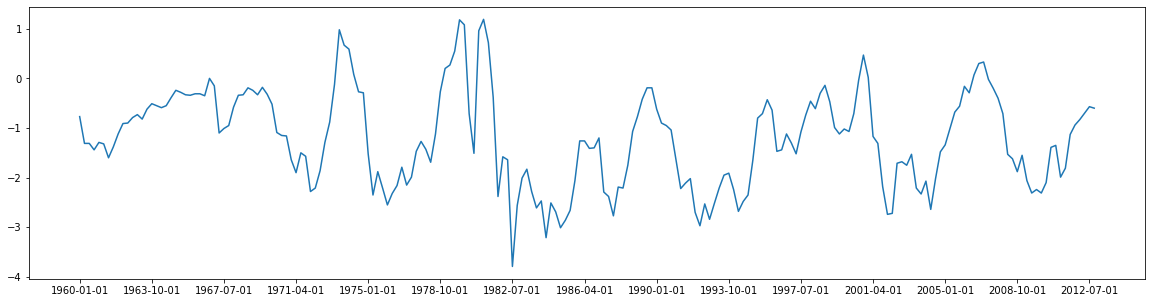

In [10]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['spread'])

#### spread ACF plot

lag at 0's autocorrelation =  1.0
lag at 1's autocorrelation =  0.86
lag at 2's autocorrelation =  0.68
lag at 3's autocorrelation =  0.55
lag at 4's autocorrelation =  0.41
lag at 5's autocorrelation =  0.28
lag at 6's autocorrelation =  0.15
lag at 7's autocorrelation =  0.07
lag at 8's autocorrelation =  0.04
lag at 9's autocorrelation =  -0.03
lag at 10's autocorrelation =  -0.13


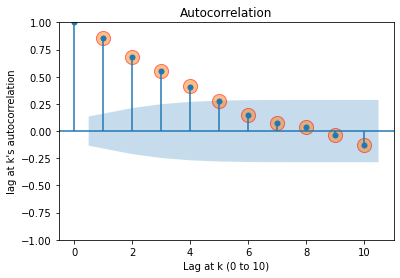

In [11]:
def acf_plot_coef(data, N_LAGS, pval):    
    auto = pd.Series(data.values)
    for i in range(0, N_LAGS+1):
        print(f"lag at {i}'s autocorrelation = ", round(auto.autocorr(lag=i),2))
        scatter = pd.DataFrame()
        scatter['lags'] = [i for i in range (1, N_LAGS +1)]
        scatter['autocorrelation'] = [ auto.autocorr(lag=i) for i in range(1, N_LAGS +1)]

    fig = plot_acf(data, lags=N_LAGS, alpha=pval)
    plt.xlabel(f'Lag at k (0 to {N_LAGS})')
    plt.ylabel("lag at k's autocorrelation")
    plt.scatter(x=scatter['lags'], y=scatter['autocorrelation'], edgecolors='red',linewidth=1, s=200, alpha = .5)
    plt.show()
    
acf_plot_coef(df['spread'], 10, 0.05)

- ACF plot을 시각화한 결과, 실제로 ρ1 = 0.86 and ρ2 = 0.68임을 알 수 있다.

#### 2.a One difficulty in performing a unit root test is to select the proper lag length. Using a maximum of 12 lags, estimate models of the form ∆st = a0 + γst−1 + Pβi∆st−i. Use the AIC and BIC methods to select lag lengths of 9, 1, and 8, respectively. In this case, does the lag length matter for the Dickey-Fuller test?

#### ADF test
Null Hypotesis : Stationarity하지 않다. (단위근이 존재)  
Alternative Hypotesis : Stationarity하다. (단위근 존재 X)

In [12]:
# maxlag와 Lag criteria를 설정하고 ADF test를 진행하는 함수 생성
def adf_test(df, i, criteria):
    result  = adfuller(df.values, maxlag = i, autolag = criteria)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Best Lag :%d' % result[2])
    print(criteria + ' : %f' % result[5])
    print('Critical value:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))

In [13]:
adf_test(df['spread'], 12, 'AIC')

ADF Statistics: -4.702604
p-value: 0.000083
Best Lag :9
AIC : 275.457192
Critical value:
	1%: -3.463
	5%: -2.876
	10%: -2.574


- p-value가 0.05보다 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

In [14]:
adf_test(df['spread'], 12, 'BIC')

ADF Statistics: -4.750543
p-value: 0.000068
Best Lag :1
BIC : 297.089896
Critical value:
	1%: -3.462
	5%: -2.875
	10%: -2.574


- p-value가 0.05보다 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

- spread에 대해서 AIC method를 사용하여 Augmented Dickey-Fuller test를 진행했을 때는 Best Lag가 9로 나타났고, BIC method를 사용하여 Augmented Dickey-Fuller test를 진행했을 때는 Best Lag가 1로 나타났다. 

- 어떤 Criteria를 사용하느냐에 따라 Best Lag length가 다르므로 AIC, BIC, Log-Likelihood 등을 모두 종합적으로 고려하여 최적의 lag length를 선택하는 것은 중요하다.

#### 2.b Use a lag length of 8 and perform an augmented Dickey-Fuller test of the spread. You should find (1). Is the spread stationary?

In [15]:
adf_test(df['spread'], 8, 'AIC')

ADF Statistics: -4.365749
p-value: 0.000341
Best Lag :8
AIC : 278.241723
Critical value:
	1%: -3.463
	5%: -2.876
	10%: -2.574


- p-value가 0.05보다 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

#### 2.c Perform an augmented Dickey-Fuller test of the 5-year rate using seven lags. Is the 5-year rate stationary?

In [16]:
adf_test(df['r5'], 7, 'BIC')

ADF Statistics: -1.487999
p-value: 0.539440
Best Lag :3
BIC : 356.213835
Critical value:
	1%: -3.462
	5%: -2.876
	10%: -2.574


- p-value가 0.05보다 크기 때문에 Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다.

#### 2.d Perform an augmented Dickey-Fuller test on the unemployment rate (UNEMP). If you use eight lagged changes you will find (2). Note that the t-statistic on β8 is -2.65.

In [17]:
adf_test(df['Unemp'], 8, 'AIC')

ADF Statistics: -2.254621
p-value: 0.187021
Best Lag :8
AIC : 9.233003
Critical value:
	1%: -3.463
	5%: -2.876
	10%: -2.574


- p-value가 0.05보다 크기 때문에 Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다.

### 3. This set of exercise uses data from the file entitled QUARTERLY.XLSX in order to estimate the dynamic effects of aggregate demand and supply shocks on industrial production and the inflation rate. Create the logarithmic change in the index of industrial production (indprod) as ∆lipt = ln(indprodt) − ln(indprodt−1) and the inflation rate (as measured by the CPI) as inft = log(cpit) − log(cpit−1).

#### Create the logarithmic change in the index of industrial production

In [19]:
df['yt_indprod'] = np.log(df['IndProd']) - np.log(df['IndProd'].shift(1))

#### Create the logarithmic change in the inflation rate as measured by the CPI

In [20]:
df['yt_cpi'] = np.log(df['CPI']) - np.log(df['CPI'].shift(1))

df.dropna(inplace = True)

In [22]:
df

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,...,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,spread,yt_indprod,yt_cpi
Date,,,,,,,,,,,,,,,,,,,,,
1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,...,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,-1.31,-0.021970,0.005766
1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,...,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,-1.31,-0.016800,0.000676
1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,...,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,-1.44,-0.024182,0.006401
1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,...,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,-1.29,-0.015247,0.002013
1961-04-01,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,...,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131,-1.32,0.038560,-0.000335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-01,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,...,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496,-0.94,0.012243,0.003487
2012-01-01,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,...,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519,-0.83,0.014269,0.005711
2012-04-01,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,...,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500,-0.70,0.005877,0.002494


#### Visualization IndProd

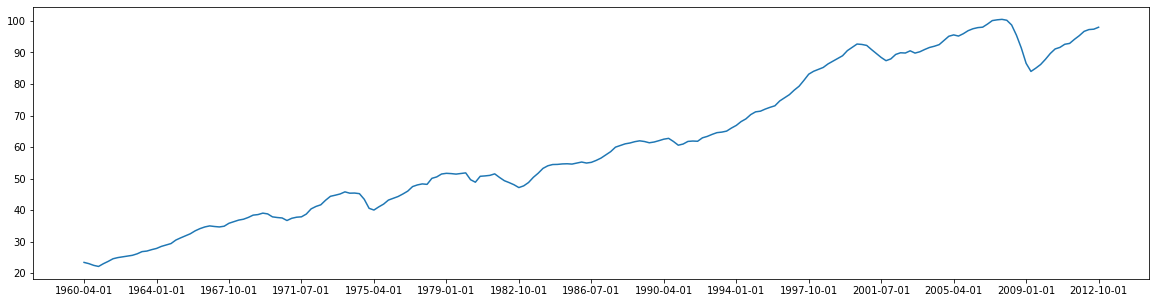

In [46]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['IndProd'])

#### Visualization yt_indprod

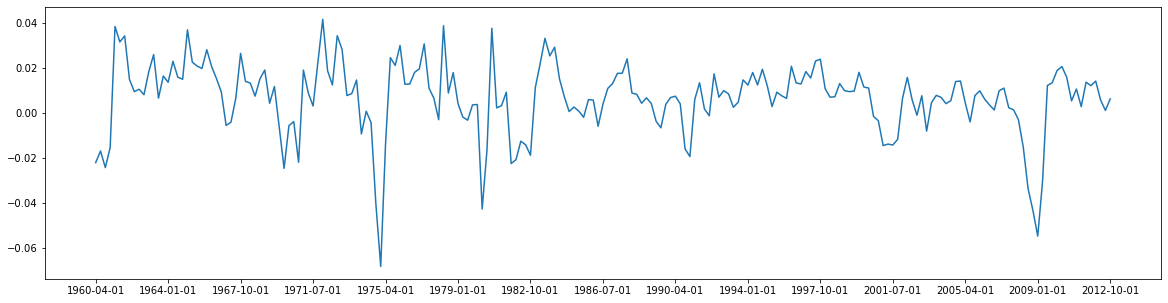

In [47]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['yt_indprod'])

#### Visualization CPI

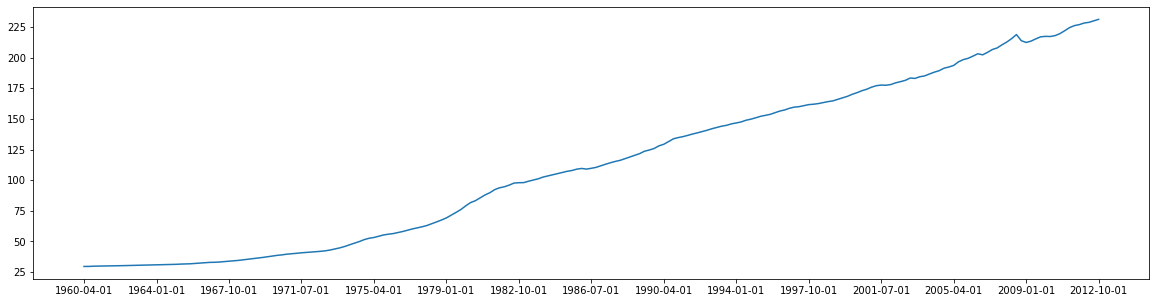

In [48]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['CPI'])

#### Visualization yt_cpi

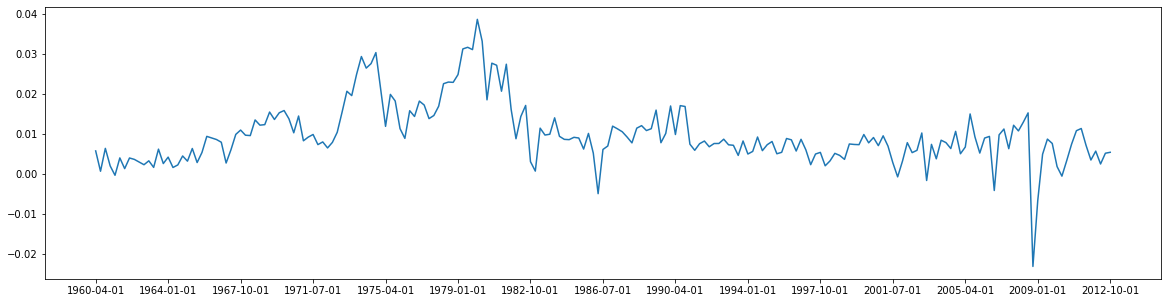

In [49]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,212,15))
plt.plot(df['yt_cpi'])

#### 3.a Determine whether ∆lipt and inft are stationary.

##### yt_indprod ADF test

In [40]:
def adf_test_1(df):
    result  = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical value:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))

In [41]:
adf_test_1(df['yt_indprod'])

ADF Statistics: -4.738741
p-value: 0.000071
Critical value:
	1%: -3.464
	5%: -2.876
	10%: -2.575


- p-value가 0.05보다 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

##### yt_cpi ADF test

In [60]:
adf_test_1(df['yt_cpi'])

ADF Statistics: -2.941870
p-value: 0.040691
Critical value:
	1%: -3.462
	5%: -2.876
	10%: -2.574


- p-value가 0.05보다 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

#### 3.b Estimate the two-variable VAR using three lags of each variable and a constant and save the residuals. Verify that which lag (three or five) is selected by SBC, AIC, or any other lag selection criteria.

In [64]:
var = VAR(df[['yt_indprod','yt_cpi']])
var.select_order(maxlags=10).summary()

,AIC,BIC,FPE,HQIC
0,-18.06,-18.03,1.429e-08,-18.05
1,-19.38,-19.29,3.816e-09,-19.34
2,-19.42,-19.25,3.686e-09,-19.35
3,-19.52,-19.29*,3.332e-09,-19.43*
4,-19.53,-19.23,3.313e-09,-19.41
5,-19.53*,-19.17,3.303e-09*,-19.38
6,-19.51,-19.08,3.377e-09,-19.33
7,-19.48,-18.99,3.460e-09,-19.28
8,-19.46,-18.90,3.528e-09,-19.24
9,-19.46,-18.84,3.535e-09,-19.21


- yt_indprod와 yt_cpi에 대해서 ADF test를 진행한 결과, 모두 stationary process인 것으로 확인되었다.
- 따라서 VAR 모형을 실시할 수 있다.
- AIC, BIC, FPE, HQIC와 같은 lag selection criteria를 종합적으로 고려해본 결과, lag 3과 lag 5 중 lag를 선택할 수 있다. 

In [67]:
fit = sm.tsa.VAR(df[['yt_indprod','yt_cpi']]).fit(maxlags=3) 
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, May, 2023
Time:                     12:38:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.2943
Nobs:                     208.000    HQIC:                  -19.4281
Log likelihood:           1453.69    FPE:                3.33458e-09
AIC:                     -19.5190    Det(Omega_mle):     3.12098e-09
--------------------------------------------------------------------
Results for equation yt_indprod
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.008056         0.001648            4.888           0.000
L1.yt_indprod         0.631566         0.069512            9.086           0.000
L1.yt_cpi            -0.228092         0.178703        

In [23]:
fit = sm.tsa.VAR(df[['yt_indprod','yt_cpi']]).fit(maxlags=5) 
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, May, 2023
Time:                     20:50:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.2008
Nobs:                     206.000    HQIC:                  -19.4125
Log likelihood:           1451.69    FPE:                3.21306e-09
AIC:                     -19.5562    Det(Omega_mle):     2.89557e-09
--------------------------------------------------------------------
Results for equation yt_indprod
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.007073         0.001805            3.918           0.000
L1.yt_indprod         0.633728         0.070430            8.998           0.000
L1.yt_cpi            -0.174458         0.187485        

Lag 3과 5로 VAR 모형을 모두 실시해 본 결과, criteria 값이 전체적으로 비슷하기 때문에 parsimonious한 model를 만들기 위해 lag 3을 선택하겠다.

### 3.c Perform the Granger causality tests. Verify that the F-statistic for the test that inflation Grnager-causes industrial production is 4.82 (with a significance level of 0.003) and that Fstatistic for the test that industrial production Granger-inflation is 5.1050 (with a significance level 0.002).

#### Granger causality test

Null Hypotesis : 한 변수가 다른 변수를 예측하는 데 도움이 되지 않는다.  
Alternative Hypotesis : 한 변수가 다른 변수를 예측하는 데 도움이 된다. 

#### Inflation Granger-causes industrial production

In [33]:
sample_outs = grangercausalitytests(df[['yt_indprod','yt_cpi']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.8763 , p=0.0011  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=11.0339 , p=0.0009  , df=1
likelihood ratio test: chi2=10.7538 , p=0.0010  , df=1
parameter F test:         F=10.8763 , p=0.0011  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2032  , p=0.0063  , df_denom=204, df_num=2
ssr based chi2 test:   chi2=10.6615 , p=0.0048  , df=2
likelihood ratio test: chi2=10.3985 , p=0.0055  , df=2
parameter F test:         F=5.2032  , p=0.0063  , df_denom=204, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8191  , p=0.0029  , df_denom=201, df_num=3
ssr based chi2 test:   chi2=14.9607 , p=0.0019  , df=3
likelihood ratio test: chi2=14.4472 , p=0.0024  , df=3
parameter F test:         F=4.8191  , p=0.0029  , df_denom=201, df_num=3


In [34]:
sample_outs[3][0]['ssr_ftest']

(4.81908484395867, 0.002911367624402613, 201.0, 3)

- Granger causality test 결과, F-statistic이 4.82이고, p-value가 유의수준 0.05하에서 0.003으로 작기 때문에 Null Hypothesis를 reject할 수 있다.
- 따라서 Inflation이 Industrial Production을 예측하는 데 도움이 된다는 결과를 얻을 수 있다.

#### Industrial production Granger-causes Inflation

In [96]:
sample_outs_1 = grangercausalitytests(df[['yt_cpi','yt_indprod']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7363  , p=0.0996  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=2.7759  , p=0.0957  , df=1
likelihood ratio test: chi2=2.7577  , p=0.0968  , df=1
parameter F test:         F=2.7363  , p=0.0996  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3166  , p=0.0056  , df_denom=204, df_num=2
ssr based chi2 test:   chi2=10.8938 , p=0.0043  , df=2
likelihood ratio test: chi2=10.6194 , p=0.0049  , df=2
parameter F test:         F=5.3166  , p=0.0056  , df_denom=204, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.1050  , p=0.0020  , df_denom=201, df_num=3
ssr based chi2 test:   chi2=15.8483 , p=0.0012  , df=3
likelihood ratio test: chi2=15.2735 , p=0.0016  , df=3
parameter F test:         F=5.1050  , p=0.0020  , df_denom=201, df_num=3


In [97]:
sample_outs_1[3][0]['ssr_ftest']

(5.104971252585164, 0.001999621817898171, 201.0, 3)

- Granger causality test 결과, F-statistic이 5.1050이고, p-value가 유의수준 0.05하에서 0.002으로 작기 때문에 Null Hypothesis를 reject할 수 있다.
- 따라서 Industrial Production이 Inflation을 예측하는 데 도움이 된다는 결과를 얻을 수 있다.

최종적으로 Inflation과 Industrial Production은 서로 Granger 인과영향을 미친다.

### 4. Now, I assume that you have set your objective (theme) of your term paper. By now, you must have your data on two (X and Y , at least) or more variables in your hands. You have already held some statistical analyses based on your problem sets Take the two time series that you selected last week, take their first differences if they are nonstationary, and select an appropriate VAR model. You may refer to the following questions to summarize your results.

### 분석 개요

2022년 5월 23일에 한국거래소는 유가증권시장 상장 리츠 종목 중 시가총액 상위 10개 종목을 유동 시가총액으로 가중해 산출한 지수인 **리츠 TOP10 지수**를 발표했다. 리츠 상품은 리츠 회사의 재정 상황, 기초 자산의 건전성, 거시경제 상황에 많은 영향을 받는 상품이다. 1년이 되가는 이 시점에서 2022년 5월 23일부터 2023년 5월 22일까지의 237일 간의 일간 시계열 자료를 바탕으로 리츠 TOP10 지수 수익률에 영향을 미치는 요인을 분석해보고자 한다.

#### 사용하는 데이터
1. KRX 리츠 TOP10 지수
2. KRX 건설 지수 
3. 한국은행 뉴스심리지수
4. 장단기금리차(T10Y2Y)

##### Data Load and preprocessing

#### KRX 리츠 TOP10지수

In [89]:
KRX_REITs = pd.read_excel('KRX_리츠TOP10지수.xlsx')

In [90]:
KRX_REITs = KRX_REITs.sort_index(ascending=False)
KRX_REITs.reset_index(drop = True, inplace = True)
KRX_REITs.set_index('일자',drop=True, inplace = True)

In [91]:
KRX_REITs

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2022/05/23,1187.49,-4.87,-0.41,1188.66,1189.77,1183.90,1724259,10457701250,7298664191130
2022/05/24,1194.48,6.99,0.59,1186.89,1197.45,1185.45,1787565,11364414430,7341177703710
2022/05/25,1205.65,11.17,0.94,1194.04,1209.36,1192.90,3214710,20588951460,7410036495410
2022/05/26,1215.53,9.88,0.82,1206.46,1216.10,1205.86,2934410,18694273130,7476375804590
2022/05/27,1220.22,4.69,0.39,1220.25,1222.36,1214.48,2884849,18715622493,7500701282260
...,...,...,...,...,...,...,...,...,...
2023/05/17,855.59,-3.62,-0.42,859.01,860.11,853.61,1462044,6607965785,5933869653255
2023/05/18,857.98,2.39,0.28,857.36,859.46,855.51,1076735,4899659835,5949788044340
2023/05/19,862.43,4.45,0.52,860.00,862.44,854.28,1174625,5414064275,5979107131335


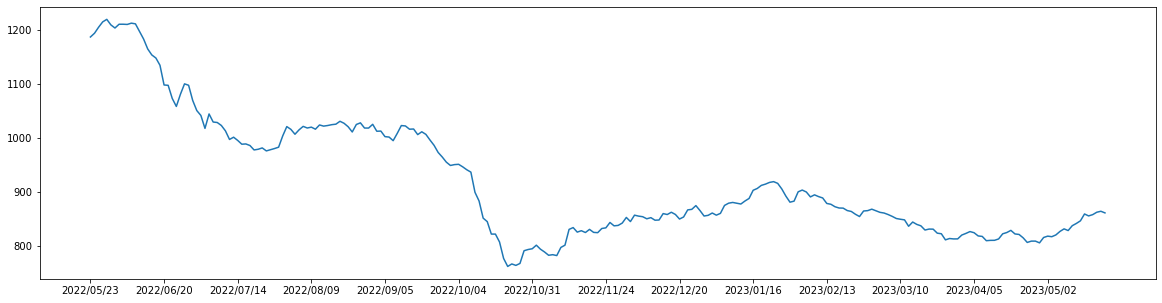

In [92]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,249,18))
plt.plot(KRX_REITs['종가'])

In [93]:
adf_test_1(KRX_REITs['종가'])

ADF Statistics: -3.123882
p-value: 0.024836
Critical value:
	1%: -3.458
	5%: -2.874
	10%: -2.573


- 좀 더 강한 가정인 유의수준 0.01하에서 p-value가 0.01보다 크기 때문에  Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다. 

#### KRX 리츠 TOP10 지수 종가 로그 차분 실시

In [94]:
KRX_REITs['yt_종가'] = np.log(KRX_REITs['종가']) - np.log(KRX_REITs['종가'].shift(1))

In [95]:
KRX_REITs.dropna(inplace = True)

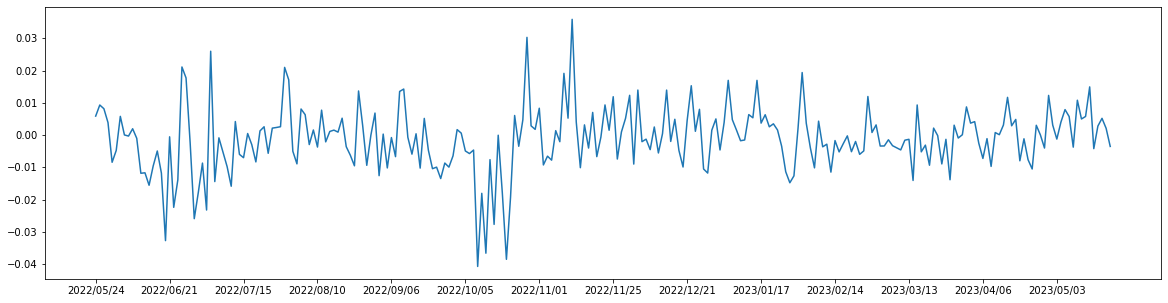

In [96]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,249,18))
plt.plot(KRX_REITs['yt_종가'])

In [97]:
adf_test_1(KRX_REITs['yt_종가'])

ADF Statistics: -8.181190
p-value: 0.000000
Critical value:
	1%: -3.457
	5%: -2.873
	10%: -2.573


- 로그 차분 후의 p-value가 매우 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

In [98]:
KRX_REITs_df = KRX_REITs[['yt_종가']]

KRX_REITs_df

#### KRX 건설 지수

In [35]:
KRX건설지수 = pd.read_excel('KRX건설지수.xlsx')

In [36]:
KRX건설지수 = KRX건설지수.sort_index(ascending=False)
KRX건설지수.reset_index(drop = True, inplace = True)
KRX건설지수.set_index('일자',drop=True, inplace = True)

In [37]:
KRX건설지수

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2022/05/23,627.13,-7.57,-1.19,636.51,636.51,623.34,10186475,240870706085,45783351628290
2022/05/24,622.74,-4.39,-0.70,625.36,634.77,622.74,17066882,318643153590,45250320884230
2022/05/25,632.37,9.63,1.55,628.50,635.89,622.85,11875619,249881253200,46020458110225
2022/05/26,634.68,2.31,0.37,633.68,639.08,631.32,9521930,222173465440,46071220663305
2022/05/27,632.63,-2.05,-0.32,642.70,642.81,629.17,8018103,276870768600,45846058837480
...,...,...,...,...,...,...,...,...,...
2023/05/17,680.59,-0.29,-0.04,677.30,682.04,674.82,13387497,278757935881,53981502890284
2023/05/18,686.32,5.73,0.84,685.13,689.08,681.43,13581151,355760394860,54609429223364
2023/05/19,694.64,8.32,1.21,691.43,697.89,688.22,70803404,447307161777,54627877958261


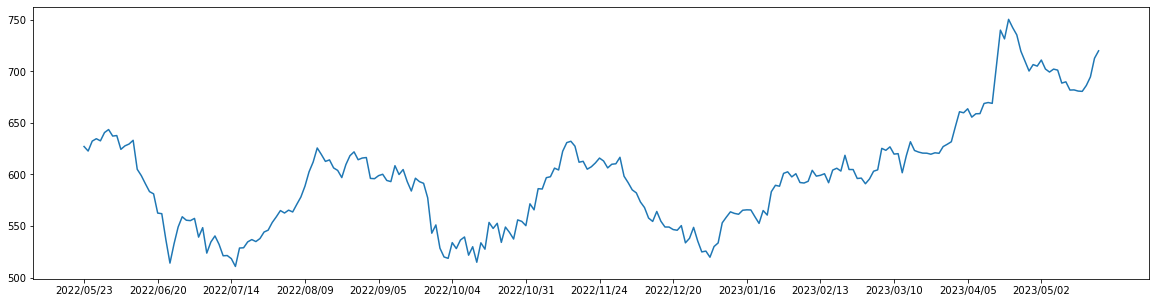

In [38]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,249,18))
plt.plot(KRX건설지수['종가'])

In [42]:
adf_test_1(KRX건설지수['종가'])

ADF Statistics: -1.097290
p-value: 0.716152
Critical value:
	1%: -3.457
	5%: -2.873
	10%: -2.573


- p-value가 매우 크기 때문에 Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다.

#### KRX 건설지수 종가 로그 차분 실시

In [44]:
KRX건설지수['yt_건설종가'] = np.log(KRX건설지수['종가']) - np.log(KRX건설지수['종가'].shift(1))

In [45]:
KRX건설지수.dropna(inplace = True)

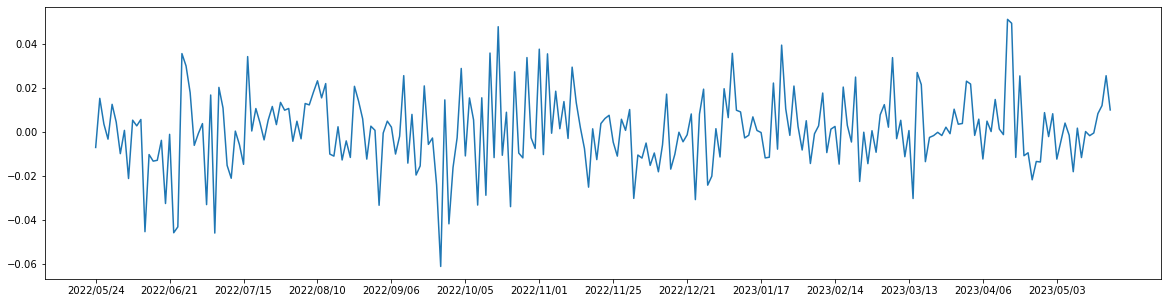

In [46]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,248,18))
plt.plot(KRX건설지수['yt_건설종가'])

In [47]:
adf_test_1(KRX건설지수['yt_건설종가'])

ADF Statistics: -9.224101
p-value: 0.000000
Critical value:
	1%: -3.457
	5%: -2.873
	10%: -2.573


- 로그 차분 후의 p-value가 매우 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

In [48]:
KRX건설지수_df = KRX건설지수[['yt_건설종가']]
KRX건설지수_df

,yt_건설종가
일자,
2022/05/24,-0.007025
2022/05/25,0.015346
2022/05/26,0.003646
2022/05/27,-0.003235
2022/05/30,0.012613
...,...
2023/05/17,-0.000426
2023/05/18,0.008384
2023/05/19,0.012050


#### 장단기금리차(T10Y2Y)

In [54]:
장단기금리차 = pd.read_excel('T10Y2Y.xls')
장단기금리차['observation_date'] = [str(장단기금리차['observation_date'][i])[0:10] for i in range(len(장단기금리차))]
장단기금리차['observation_date'] = 장단기금리차['observation_date'].str.replace('-','/')
장단기금리차.dropna(inplace = True)
장단기금리차.reset_index(drop = True, inplace = True)
장단기금리차.set_index('observation_date',drop=True, inplace = True)

In [55]:
장단기금리차

,T10Y2Y
observation_date,
2022/05/23,0.21
2022/05/24,0.26
2022/05/25,0.27
2022/05/26,0.29
2022/05/27,0.27
...,...
2023/05/17,-0.55
2023/05/18,-0.59
2023/05/19,-0.58


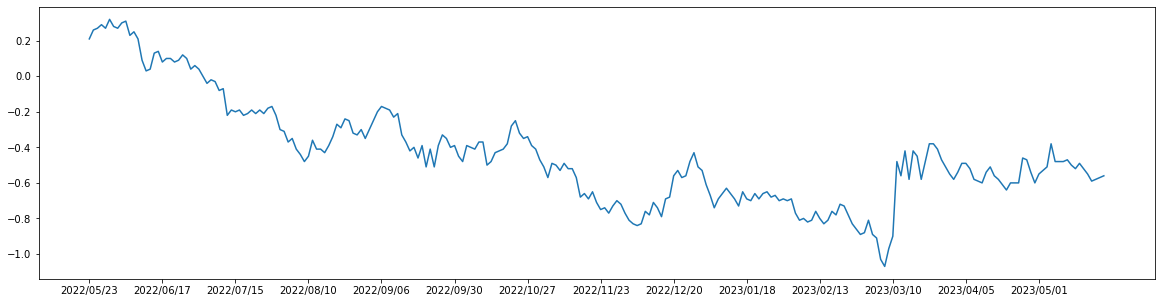

In [56]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,251,18))
plt.plot(장단기금리차['T10Y2Y'])

In [57]:
adf_test_1(장단기금리차['T10Y2Y'])

ADF Statistics: -2.579074
p-value: 0.097400
Critical value:
	1%: -3.457
	5%: -2.873
	10%: -2.573


- 좀 더 강한 가정인 유의수준 0.01하에서 p-value가 0.01보다 크기 때문에  Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다. 

#### 장단기금리차 차분 실시

In [62]:
장단기금리차['yt_T10Y2Y'] = 장단기금리차['T10Y2Y'] - 장단기금리차['T10Y2Y'].shift(1)

장단기금리차.dropna(inplace = True)

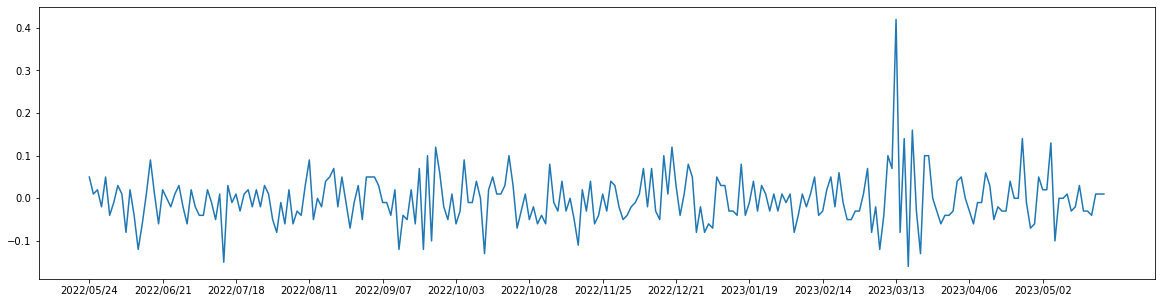

In [66]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,250,18))
plt.plot(장단기금리차['yt_T10Y2Y'])

In [68]:
adf_test_1(장단기금리차['yt_T10Y2Y'])

ADF Statistics: -9.828703
p-value: 0.000000
Critical value:
	1%: -3.457
	5%: -2.873
	10%: -2.573


- 차분 후의 p-value가 매우 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

In [70]:
장단기금리차_df = 장단기금리차[['yt_T10Y2Y']]
장단기금리차_df

,yt_T10Y2Y
observation_date,
2022/05/24,0.05
2022/05/25,0.01
2022/05/26,0.02
2022/05/27,-0.02
2022/05/31,0.05
...,...
2023/05/17,-0.03
2023/05/18,-0.04
2023/05/19,0.01


#### 한국은행 뉴스심리지수

In [77]:
BOK뉴스심리지수 = pd.read_excel('BOK뉴스심리지수.xlsx')

In [78]:
BOK뉴스심리지수 = BOK뉴스심리지수.sort_index(ascending=False)
BOK뉴스심리지수.reset_index(drop = True, inplace = True)
BOK뉴스심리지수.set_index('일자',drop=True, inplace = True)

BOK뉴스심리지수

,지수
일자,
2022/05/23,108.47
2022/05/24,107.77
2022/05/25,108.64
2022/05/26,109.47
2022/05/27,111.67
...,...
2023/05/16,94.64
2023/05/17,95.60
2023/05/18,96.50


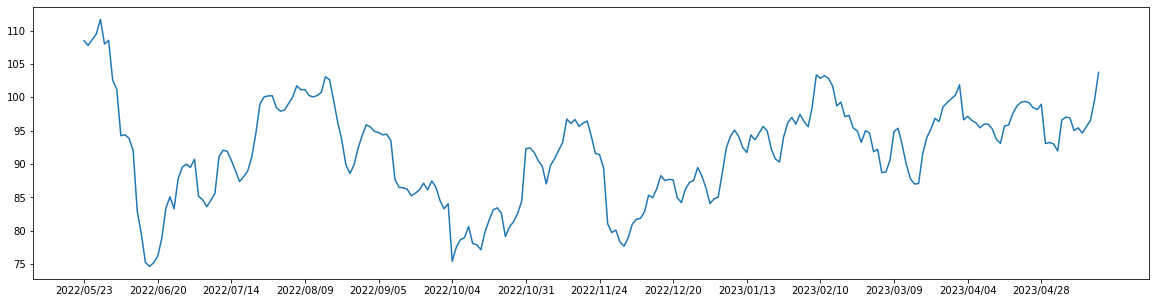

In [79]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,249,18))
plt.plot(BOK뉴스심리지수['지수'])

In [80]:
adf_test_1(BOK뉴스심리지수['지수'])

ADF Statistics: -2.766235
p-value: 0.063261
Critical value:
	1%: -3.458
	5%: -2.874
	10%: -2.573


- 좀 더 강한 가정인 유의수준 0.01하에서 p-value가 0.01보다 크기 때문에  Null Hypothesis를 reject할 수 없다.  
- 따라서 non-stationary하다. 

#### 뉴스심리지수 차분 실시

In [81]:
BOK뉴스심리지수['yt_지수'] = BOK뉴스심리지수['지수'] - BOK뉴스심리지수['지수'].shift(1)

BOK뉴스심리지수.dropna(inplace = True)

In [83]:
BOK뉴스심리지수

,지수,yt_지수
일자,,
2022/05/24,107.77,-0.70
2022/05/25,108.64,0.87
2022/05/26,109.47,0.83
2022/05/27,111.67,2.20
2022/05/30,107.97,-3.70
...,...,...
2023/05/16,94.64,-0.77
2023/05/17,95.60,0.96
2023/05/18,96.50,0.90


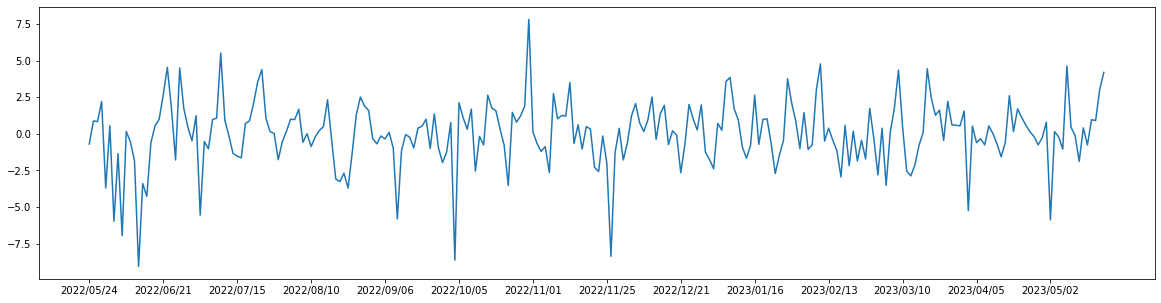

In [84]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,249,18))
plt.plot(BOK뉴스심리지수['yt_지수'])

In [85]:
adf_test_1(BOK뉴스심리지수['yt_지수'])

ADF Statistics: -5.818169
p-value: 0.000000
Critical value:
	1%: -3.458
	5%: -2.874
	10%: -2.573


- 차분 후의 p-value가 매우 작기 때문에 Null Hypothesis를 reject할 수 있다.  
- 따라서 stationary하다.

In [87]:
BOK뉴스심리지수_df = BOK뉴스심리지수[['yt_지수']]
BOK뉴스심리지수_df

,yt_지수
일자,
2022/05/24,-0.70
2022/05/25,0.87
2022/05/26,0.83
2022/05/27,2.20
2022/05/30,-3.70
...,...
2023/05/16,-0.77
2023/05/17,0.96
2023/05/18,0.90


#### Merge Data

In [100]:
KRX_REITs_df.reset_index(inplace = True)
KRX건설지수_df.reset_index(inplace = True)
장단기금리차_df.reset_index(inplace = True)
BOK뉴스심리지수_df.reset_index(inplace = True)

In [108]:
KRX_REITs_df.columns = ['Date', 'KRX리츠TOP지수']
KRX건설지수_df.columns = ['Date', 'KRX건설지수']
장단기금리차_df.columns = ['Date', 'BOK뉴스심리지수']
BOK뉴스심리지수_df.columns = ['Date', 'T10Y2Y']

In [109]:
df_final = pd.DataFrame()
df_final = pd.merge(KRX_REITs_df, KRX건설지수_df, how='inner',on=['Date'])
df_final = pd.merge(df_final, 장단기금리차_df, how='inner',on=['Date'])
df_final = pd.merge(df_final, BOK뉴스심리지수_df, how='inner',on=['Date'])

#### 최종 데이터셋

In [110]:
df_final

,Date,KRX리츠TOP지수,KRX건설지수,BOK뉴스심리지수,T10Y2Y
0,2022/05/24,0.005869,-0.007025,0.05,-0.70
1,2022/05/25,0.009308,0.015346,0.01,0.87
2,2022/05/26,0.008161,0.003646,0.02,0.83
3,2022/05/27,0.003851,-0.003235,-0.02,2.20
4,2022/05/31,-0.004797,0.004532,0.05,0.55
...,...,...,...,...,...
232,2023/05/16,0.014927,-0.001658,-0.03,-0.77
233,2023/05/17,-0.004222,-0.000426,-0.03,0.96
234,2023/05/18,0.002789,0.008384,-0.04,0.90
235,2023/05/19,0.005173,0.012050,0.01,3.04


#### 4.a Provide a table for the AIC and BIC and a brief discussion of your final lag-length selection

In [111]:
var = VAR(df_final[['KRX리츠TOP지수','KRX건설지수','BOK뉴스심리지수','T10Y2Y']])
var.select_order(maxlags=10).summary()

,AIC,BIC,FPE,HQIC
0,-21.53,-21.47*,4.467e-10,-21.50
1,-21.67*,-21.37,3.893e-10*,-21.55*
2,-21.65,-21.11,3.960e-10,-21.43
3,-21.55,-20.77,4.367e-10,-21.24
4,-21.50,-20.47,4.602e-10,-21.09
5,-21.49,-20.22,4.651e-10,-20.98
6,-21.43,-19.92,4.963e-10,-20.82
7,-21.34,-19.59,5.419e-10,-20.64
8,-21.27,-19.28,5.851e-10,-20.46
9,-21.25,-19.02,5.953e-10,-20.35


AIC, BIC, FPE, HQIC와 같은 lag selection criteria를 종합적으로 고려해본 결과, lag 1을 선택하겠다.

#### 4.b Then run the final model, and paste the output from statistical package into your homework

In [113]:
fit = sm.tsa.VAR(df_final[['KRX리츠TOP지수','KRX건설지수','BOK뉴스심리지수','T10Y2Y']]).fit(maxlags=1)
display(fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, May, 2023
Time:                     21:41:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -21.4024
Nobs:                     236.000    HQIC:                  -21.5776
Log likelihood:           1240.64    FPE:                3.78077e-10
AIC:                     -21.6959    Det(Omega_mle):     3.47665e-10
--------------------------------------------------------------------
Results for equation KRX리츠TOP지수
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.000864         0.000606           -1.426           0.154
L1.KRX리츠TOP지수         0.339538         0.067945            4.997           0.000
L1.KRX건설지수           -0.085569         0.037726        

#### 4.c Next, using your data, test the hypothesis that variable 1 does not Granger cause variable. Test the hypothesis that variable 2 does not Granger cause variable 1. Write up a brief discussion of the meaning of your results.

#### Granger causality test

Null Hypotesis : 한 변수가 다른 변수를 예측하는 데 도움이 되지 않는다.  
Alternative Hypotesis : 한 변수가 다른 변수를 예측하는 데 도움이 된다. 

#### KRX리츠TOP지수 -> KRX건설지수

In [116]:
sample_outs_2 = grangercausalitytests(df_final[['KRX리츠TOP지수','KRX건설지수']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9728  , p=0.0267  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=5.0368  , p=0.0248  , df=1
likelihood ratio test: chi2=4.9838  , p=0.0256  , df=1
parameter F test:         F=4.9728  , p=0.0267  , df_denom=233, df_num=1


In [118]:
sample_outs_2[1][0]['ssr_ftest']

(4.972771767970364, 0.026702868901233807, 233.0, 1)

- Granger causality test 결과, F-statistic이 4.972이고, p-value가 유의수준 0.05하에서 0.02로 작기 때문에 Null Hypothesis를 reject할 수 있다.

#### KRX건설지수 -> KRX리츠TOP지수

In [121]:
sample_outs_2_1 = grangercausalitytests(df_final[['KRX건설지수','KRX리츠TOP지수']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3141  , p=0.5757  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=0.3181  , p=0.5728  , df=1
likelihood ratio test: chi2=0.3179  , p=0.5729  , df=1
parameter F test:         F=0.3141  , p=0.5757  , df_denom=233, df_num=1


In [123]:
sample_outs_2_1[1][0]['ssr_ftest']

(0.31405875756021134, 0.5757386281846106, 233.0, 1)

- Granger causality test 결과, F-statistic이 0.314이고, p-value가 유의수준 0.05하에서 0.57으로 크기 때문에 Null Hypothesis를 reject할 수 없다.

건설지수가 리츠지수에 Granger 인과영향을 주지만 리츠지수는 건설지수에 Granger 인과영향을 주지 않는다.

---

#### BOK뉴스심리지수 -> KRX리츠TOP지수

In [126]:
sample_outs_3 = grangercausalitytests(df_final[['KRX리츠TOP지수','BOK뉴스심리지수']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8966  , p=0.3447  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=0.9082  , p=0.3406  , df=1
likelihood ratio test: chi2=0.9064  , p=0.3411  , df=1
parameter F test:         F=0.8966  , p=0.3447  , df_denom=233, df_num=1


In [127]:
sample_outs_3[1][0]['ssr_ftest']

(0.8966397821872161, 0.3446653034063859, 233.0, 1)

- Granger causality test 결과, F-statistic이 0.896이고, p-value가 유의수준 0.05하에서 0.344로 크기 때문에 Null Hypothesis를 reject할 수 없다.

#### KRX리츠TOP지수 -> BOK뉴스심리지수

In [128]:
sample_outs_3_1 = grangercausalitytests(df_final[['BOK뉴스심리지수','KRX리츠TOP지수']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0392  , p=0.0456  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=4.0912  , p=0.0431  , df=1
likelihood ratio test: chi2=4.0561  , p=0.0440  , df=1
parameter F test:         F=4.0392  , p=0.0456  , df_denom=233, df_num=1


In [129]:
sample_outs_3_1[1][0]['ssr_ftest']

(4.039183211094787, 0.045608382096694294, 233.0, 1)

- Granger causality test 결과, F-statistic이 4.039이고, p-value가 유의수준 0.05하에서 0.04로 작기 때문에 Null Hypothesis를 reject할 수 있다.

리츠지수가 뉴스심리지수에 Granger 인과영향을 주지만 뉴스심리지수는 리츠지수에 Granger 인과영향을 주지 않는다.

---

#### T10Y2Y -> KRX리츠TOP지수

In [131]:
sample_outs_4 = grangercausalitytests(df_final[['KRX리츠TOP지수','T10Y2Y']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0314  , p=0.8595  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=0.0318  , p=0.8585  , df=1
likelihood ratio test: chi2=0.0318  , p=0.8585  , df=1
parameter F test:         F=0.0314  , p=0.8595  , df_denom=233, df_num=1


In [132]:
sample_outs_4[1][0]['ssr_ftest']

(0.031402464494758205, 0.8594994277158686, 233.0, 1)

- Granger causality test 결과, F-statistic이 0.031이고, p-value가 유의수준 0.05하에서 0.85로 크기 때문에 Null Hypothesis를 reject할 수 없다.

#### KRX리츠TOP지수 -> T10Y2Y

In [135]:
sample_outs_4_1 = grangercausalitytests(df_final[['T10Y2Y','KRX리츠TOP지수']], maxlag=1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4181  , p=0.0658  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=3.4621  , p=0.0628  , df=1
likelihood ratio test: chi2=3.4370  , p=0.0638  , df=1
parameter F test:         F=3.4181  , p=0.0658  , df_denom=233, df_num=1


In [136]:
sample_outs_4_1[1][0]['ssr_ftest']

(3.4181374678040264, 0.06575057990429442, 233.0, 1)

- Granger causality test 결과, F-statistic이 3.418이고, p-value가 유의수준 0.05하에서 0.06으로 크기 때문에 Null Hypothesis를 reject할 수 없다.

리츠지수와 장단기금리차는 서로 Granger 인과영향을 주지 않는다.

#### Summary

- KRX리츠TOP10의 로그 차분한 수익률에 KRX 건설지수의 로그 차분한 수익률이 Granger 인과영향을 주고, 뉴스심리지수 차분 값과 장단기금리차 차분 값은 Granger 인과영향을 주지 않는다. 
- KRX리츠TOP10의 로그 차분한 수익률이 뉴스심리지수를 차분한 값에 Granger 인과영향을 준다.